# Analise de dados de hipotiroidismo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import StratifiedKFold

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import train_test_split
# sns.set_theme(style="whitegrid")

### Carregando o dataset

In [2]:
# dataset = pd.read_csv("dataset_57_hypothyroid.csv")
dataset = pd.read_csv("phpN4gaxw.csv")
dataset.head(5)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V121,V122,V123,V124,V125,V126,V127,V128,V129,Class
0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,11800.9233,4.483500,...,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663,10.0,4
1,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,266.4145,1.053988,...,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975,50.0,3
2,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,15.613843,...,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895,250.0,4
3,2992.9019,1.380553,0.808910,1.288259,4.660135,-0.755903,-1.120470,-4.075213,4301.4033,1.652701,...,6044.5554,3.488295,2.662288,5.938297,8.544508,-1.567322,-2.701235,-6.472439,600.0,3
4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,11.732548,...,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591,150.0,4


In [3]:
dataset.shape

(13910, 130)

In [4]:
dataset.shape

(13910, 130)

In [5]:
dataset["Class"].value_counts()

5    3009
2    2926
1    2565
4    1936
6    1833
3    1641
Name: Class, dtype: int64

In [6]:

for column in dataset:
  print(column, (dataset[column] == "?").sum() )
  print(column, (dataset[column].notna()).sum() )


V1 0
V1 13910
V2 0
V2 13910
V3 0
V3 13910
V4 0
V4 13910
V5 0
V5 13910
V6 0
V6 13910
V7 0
V7 13910
V8 0
V8 13910
V9 0
V9 13910
V10 0
V10 13910
V11 0
V11 13910
V12 0
V12 13910
V13 0
V13 13910
V14 0
V14 13910
V15 0
V15 13910
V16 0
V16 13910
V17 0
V17 13910
V18 0
V18 13910
V19 0
V19 13910
V20 0
V20 13910
V21 0
V21 13910
V22 0
V22 13910
V23 0
V23 13910
V24 0
V24 13910
V25 0
V25 13910
V26 0
V26 13910
V27 0
V27 13910
V28 0
V28 13910
V29 0
V29 13910
V30 0
V30 13910
V31 0
V31 13910
V32 0
V32 13910
V33 0
V33 13910
V34 0
V34 13910
V35 0
V35 13910
V36 0
V36 13910
V37 0
V37 13910
V38 0
V38 13910
V39 0
V39 13910
V40 0
V40 13910
V41 0
V41 13910
V42 0
V42 13910
V43 0
V43 13910
V44 0
V44 13910
V45 0
V45 13910
V46 0
V46 13910
V47 0
V47 13910
V48 0
V48 13910
V49 0
V49 13910
V50 0
V50 13910
V51 0
V51 13910
V52 0
V52 13910
V53 0
V53 13910
V54 0
V54 13910
V55 0
V55 13910
V56 0
V56 13910
V57 0
V57 13910
V58 0
V58 13910
V59 0
V59 13910
V60 0
V60 13910
V61 0
V61 13910
V62 0
V62 13910
V63 0
V63 13910
V64 0
V64 

In [13]:
# dataset["TSH"] = dataset["TSH"].astype("float")
from sklearn.metrics import roc_auc_score

def cont_labels(samples):
  values = {}
  for sample in samples:
    if values.get(sample) != None:
      values[sample] += 1
    else:
      values[sample] = 1
  return [values[i] for i in range(min(values.keys()), max(values.keys()))]

def classifier(model_name, model, X_train, y_train, y_test):
  print("="*30, model_name, "="*30)
  model.fit(X_train, y_train)
  y_predict = regression_model.predict(X_test)
  print(classification_report(y_test, y_predict))
  # print(roc_curve(cont_labels(y_test)[:2], cont_labels(y_predict)[:2]))

In [14]:
y = dataset["Class"]
X = dataset.drop(["Class"], axis=1)
X = X.astype("float64")
skf = StratifiedKFold(n_splits=2)

# X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=199)

for n_round, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
  regression_model = LogisticRegression()
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  classifier("Regressão Logistica {}".format(n_round), regression_model, X_train, y_train, y_test)
  


============================== Regressão Logistica 1 ==============================
              precision    recall  f1-score   support

           1       0.58      0.84      0.69      1283
           2       0.91      0.80      0.85      1463
           3       0.33      0.82      0.47       821
           4       0.38      0.21      0.27       968
           5       0.99      0.25      0.40      1504
           6       0.99      0.90      0.94       916

    accuracy                           0.62      6955
   macro avg       0.70      0.64      0.60      6955
weighted avg       0.73      0.62      0.61      6955



C:\Users\Eliaquim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: y_true takes value in {1283, 1463} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
X.shape

In [ ]:

# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))


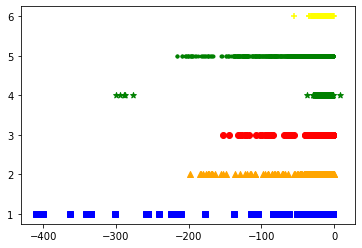

In [ ]:
class_a = 1
class_b = 2
class_c = 3
class_d = 4
class_e = 5
class_f = 6
class_0_instances = y == class_a
class_1_instances = y == class_b
class_2_instances = y == class_c
class_3_instances = y == class_d
class_4_instances = y == class_e
class_5_instances = y == class_f
feature_0 = "V128"
feature_1 = "Class"

colors = {1: "blue", 2: "orange", 3: "red", 4: "green", 5: "green", 6: "yellow"}
markers = {1: "s", 2: "^", 3:"o", 4: "*", 5: ".", 6: "+"}

plt.scatter(
    dataset[feature_0][class_0_instances],
    dataset[feature_1][class_0_instances], 
    c=colors[class_a], 
    marker=markers[class_a]
)
plt.scatter(
    dataset[feature_0][class_1_instances], 
    dataset[feature_1][class_1_instances], 
    c=colors[class_b], 
    marker=markers[class_b]
)
plt.scatter(
    dataset[feature_0][class_2_instances], 
    dataset[feature_1][class_2_instances], 
    c=colors[class_c], 
    marker=markers[class_c]
)

plt.scatter(
    dataset[feature_0][class_3_instances], 
    dataset[feature_1][class_3_instances], 
    c=colors[class_d], 
    marker=markers[class_d]
)

plt.scatter(
    dataset[feature_0][class_4_instances], 
    dataset[feature_1][class_4_instances], 
    c=colors[class_e], 
    marker=markers[class_e]
)

plt.scatter(
    dataset[feature_0][class_5_instances], 
    dataset[feature_1][class_5_instances], 
    c=colors[class_f], 
    marker=markers[class_f]
)